# Week 38





The lab session in week 37 was used for inspiration in the analytical part: https://www.youtube.com/watch?v=bK4AEcTu-oM


$$
    \mathbb{E}[(y-\tilde{y})^2] = \mathbb{E}[y^2-2y\tilde{y} + \tilde{y}^2]
$$
If we start with $\mathbb{E}[y^2]$:
$$
    \mathbb{E}[y^2] = \mathbb{E}[(f+\epsilon)^2] = \mathbb{E}[f^2] + 2f\mathbb{E}[\epsilon] + \mathbb{E}[\epsilon^2]
$$
Where $\mathbb{E}[\epsilon] = 0$ and $\mathbb{E}[\epsilon^2] = \sigma^2$, gives:
$$
    \mathbb{E}[y^2] = \mathbb{E}[f^2] + \sigma^2
$$
We then take $\mathbb{E}[2y\tilde{y}]$
$$
    \mathbb{E}[2y\tilde{y}] = 2\mathbb{E}[(f+\epsilon)\tilde{y}] = 2\mathbb{E}[f\tilde{y} + \epsilon\tilde{y}] = 2\mathbb{E}[f\tilde{y}] + 2\mathbb{E}[\epsilon\tilde{y}]
$$
where $\mathbb{E}[\epsilon\tilde{y}] = 0$
$$
    \mathbb{E}[2y\tilde{y}] = 2f\mathbb{E}[\tilde{y}]
$$
Finally we take $\mathbb{E}[\tilde{y}^2]$. Knowing $var(\tilde{y}) = \mathbb{E}[\tilde{y}^2] - \mathbb{E}[\tilde{y}]^2$, we get $\mathbb{E}[\tilde{y}^2] = var(\tilde{y}) + \mathbb{E}[\tilde{y}]^2$.

Now we can gather up the separate parts:
$$
    \begin{split}
        \mathbb{E}[(y-\tilde{y})^2] = \mathbb{E}[f^2] + \sigma^2 - 2f\mathbb{E}[\tilde{y}] + var(\tilde{y})  - \mathbb{E}[\tilde{y}]^2 \\
        = \mathbb{E}[f^2] - 2f\mathbb{E}[\tilde{y}] + \mathbb{E}[\tilde{y}]^2 + var(\tilde{y}) + \sigma^2\\
        = \mathbb{E}[(f - \tilde{y})^2] + var(\tilde{y}) + \sigma^2
    \end{split}
$$
Using the definition $bias(\tilde{y}) = \mathbb{E}[(y - \tilde{y})^2]$, we can make the approximation $f \approxeq y$, we get:
$$
    \mathbb{E}[(y-\tilde{y})^2] = bias(\tilde{y}) + var(\tilde{y}) + \sigma^2
$$

The bias refers to how much the modell is "off" the correct ouput (the actual function), and the variance refers to how spread out the predictions of the model is for a specific output.

---

The bias-variance tradeoff script in the lecture notes section 5.4 was heavily used for inspiration in the python script: https://compphysics.github.io/MachineLearning/doc/LectureNotes/_build/html/chapter3.html#the-bias-variance-tradeoff

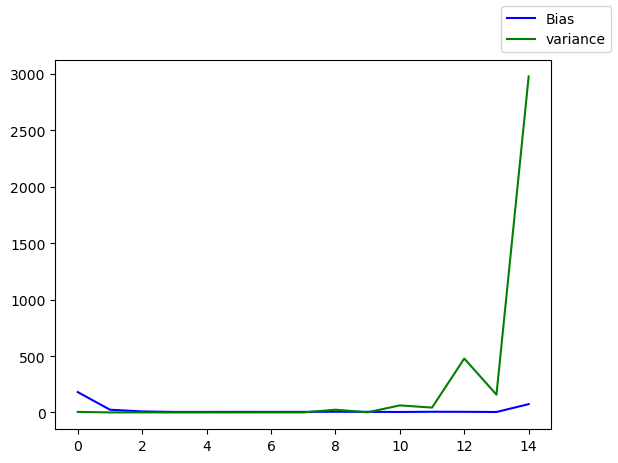

In [49]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample

np.random.seed(0)

n = 50

x = np.linspace(-2,3,50).reshape(-1, 1) 
y = x**3+5*x-10 + np.random.normal(0,0.1, x.shape)*15

todeg = 15

bootstraplim = 50

bias_list = []
var_list = []

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

for deg in range(todeg):

    model = make_pipeline(PolynomialFeatures(degree=deg), LinearRegression(fit_intercept=False))
    y_pred = np.empty((y_test.shape[0], bootstraplim))

    for i in range(bootstraplim):
        x_temp, y_temp = resample(x_train, y_train)
        y_pred[:, i] = (model.fit(x_temp,y_temp).predict(x_test).ravel())


    variance = np.mean( np.var(y_pred, axis=1, keepdims=True) )
    bias = np.mean( (y_test - np.mean(y_pred, axis=1, keepdims=True))**2)

    bias_list.append(bias)
    var_list.append(variance)

# plt.plot(x, y, "bo")
# plt.plot(x_test, y_pred, "rx")

fig, ax = plt.subplots()


ax.plot(bias_list, "b-", label="Bias")
ax.plot(var_list, "g-", label="variance")

fig.legend()

plt.show()


Here the error and variance is plotted from degree 0 to 15. From the plot we see bias decreasing over higher degrees, and variance increasing over higher degrees. Selecting one of the models between degree 1 and 9 seems to yield the best result in this scenario. Increasing the bootstrap increases the variance.